Dataset Sample:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2   

/tmp/ipython-input-2948771391.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2948771391.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

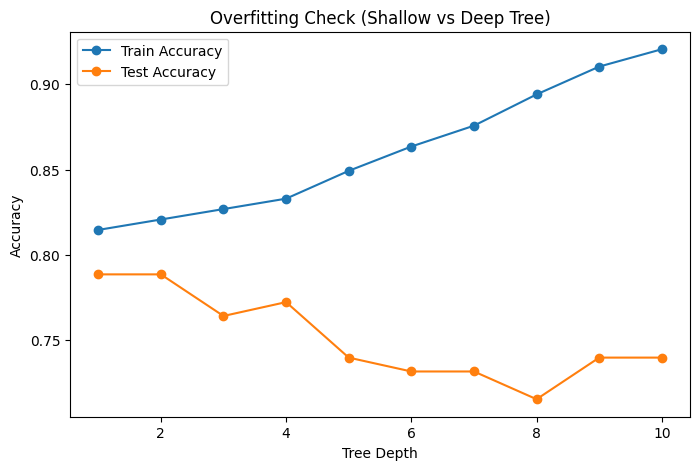


Best Depth: 1

--- Decision Tree Performance ---
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



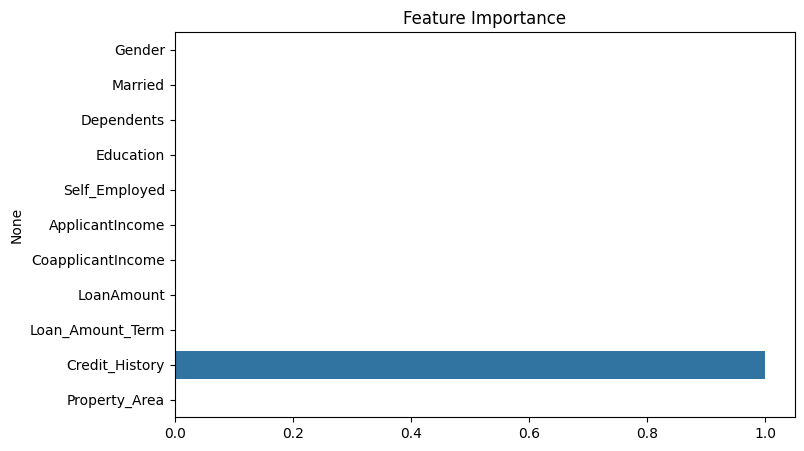


Training Accuracy: 0.814663951120163
Testing Accuracy: 0.7886178861788617


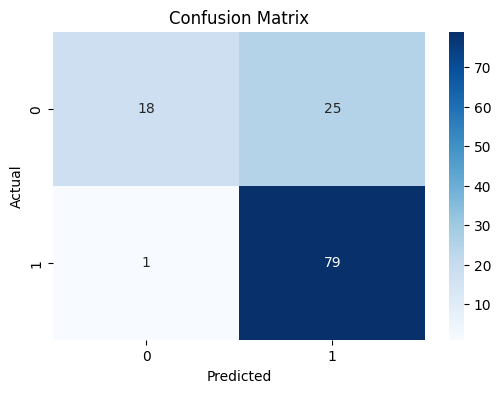

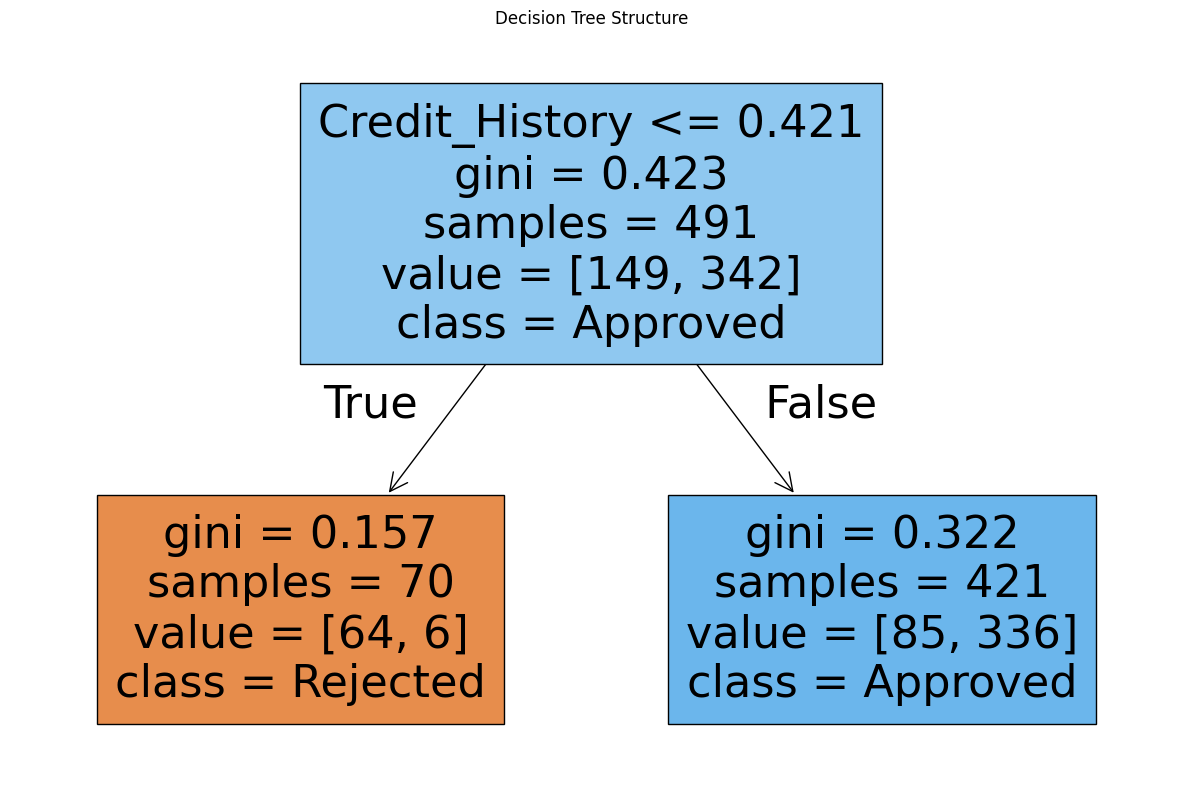

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

print("Dataset Sample:")
print(df.head())

print("\nDataset Info:")
print(df.info())

if "Loan_ID" in df.columns:
    df.drop("Loan_ID", axis=1, inplace=True)

for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = encoder.fit_transform(df[col])

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    temp_model = DecisionTreeClassifier(max_depth=d, random_state=42)
    temp_model.fit(X_train, y_train)
    train_acc.append(temp_model.score(X_train, y_train))
    test_acc.append(temp_model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_acc, label="Train Accuracy", marker="o")
plt.plot(depths, test_acc, label="Test Accuracy", marker="o")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Check (Shallow vs Deep Tree)")
plt.legend()
plt.show()

best_depth = depths[np.argmax(test_acc)]
print("\nBest Depth:", best_depth)

model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n--- Decision Tree Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()

print("\nTraining Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(15,10))
plot_tree(model, feature_names=features, class_names=["Rejected","Approved"], filled=True)
plt.title("Decision Tree Structure")
plt.show()